In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import seaborn as sns
import numpy as np
import xarray as xr
import cartopy.crs as ccrs

In [2]:
from glob import glob

files = sorted(glob('/Users/Fairy/Desktop/General_Circulation/week1/CERES__EBAF__export/*.nc'))
files

['/Users/Fairy/Desktop/General_Circulation/week1/CERES__EBAF__export/CERES_EBAF-OLR_Spacemean.nc',
 '/Users/Fairy/Desktop/General_Circulation/week1/CERES__EBAF__export/CERES_EBAF-OLR_Subset_200101-201512.nc',
 '/Users/Fairy/Desktop/General_Circulation/week1/CERES__EBAF__export/CERES_EBAF-OLR_Timemean.nc',
 '/Users/Fairy/Desktop/General_Circulation/week1/CERES__EBAF__export/CERES_EBAF-SWDO_Subset_200101-201512.nc',
 '/Users/Fairy/Desktop/General_Circulation/week1/CERES__EBAF__export/CERES_EBAF-SWDO_Timemean.nc',
 '/Users/Fairy/Desktop/General_Circulation/week1/CERES__EBAF__export/CERES_EBAF-SWUP_Subset_200101-201512.nc',
 '/Users/Fairy/Desktop/General_Circulation/week1/CERES__EBAF__export/CERES_EBAF-SWUP_Timemean.nc']

In [3]:
ds = xr.open_dataset(files[0])
OLR_toa_lw_globalmean_mon = ds.toa_lw_all_mon
ds = xr.open_dataset(files[1])
OLR_toa_lw_all_mon = ds.toa_lw_all_mon
ds = xr.open_dataset(files[2])
OLR_toa_lw_all_timemean = ds.toa_lw_all_mon[0]
ds = xr.open_dataset(files[3])
SWDO_all_monthly = ds.solar_mon
ds = xr.open_dataset(files[4])
SWDO_all_timemean = ds.solar_mon[0]
#print(ds)
ds = xr.open_dataset(files[5])
SWUP_all_monthly = ds.toa_sw_all_mon
ds = xr.open_dataset(files[6])
SWUP_all_timemean = ds.toa_sw_all_mon[0]

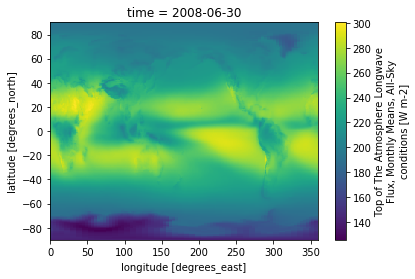

In [4]:
OLR_toa_lw_all_timemean.plot()

Text(0.5, 1.0, 'OLR long time average (2001-2015)')

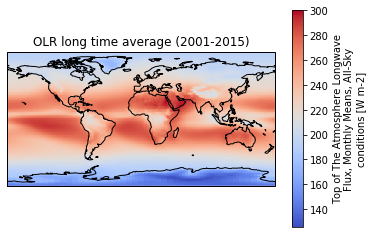

In [5]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
OLR_toa_lw_all_timemean.plot(cmap=plt.cm.coolwarm)
plt.title('OLR long time average (2001-2015)')
#plot slide 7

Text(0.5, 1.0, 'SWDO long time average')

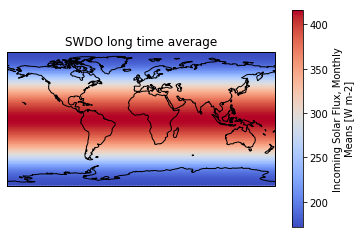

In [6]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
SWDO_all_timemean.plot(cmap=plt.cm.coolwarm)
plt.title('SWDO long time average')
##plot not needed

Text(0.5, 1.0, 'SWUP long time average')

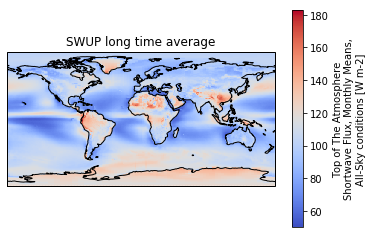

In [7]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
SWUP_all_timemean.plot(cmap=plt.cm.coolwarm)
plt.title('SWUP long time average')
##plot not needed

Text(0.5, 1.0, 'SW net long time average')

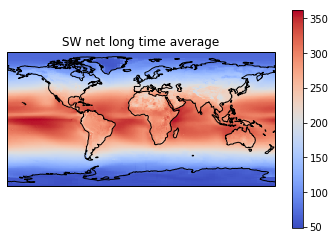

In [8]:
SW_net_all_timemean = SWDO_all_timemean-SWUP_all_timemean
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
SW_net_all_timemean.plot(cmap=plt.cm.coolwarm)
plt.title('SW net long time average')
#plot slide 8

Text(0.5, 1.0, 'NET Flux long time average')

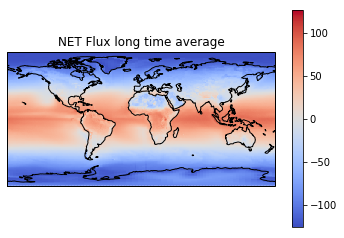

In [9]:
Net_flux_TOA = SW_net_all_timemean - OLR_toa_lw_all_timemean
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
Net_flux_TOA.plot(cmap=plt.cm.coolwarm)
plt.title('NET Flux long time average')
#plot slide 9

In [10]:
#calculate global mean values for OLR and SWDO - SWUP = OLR_toa_lw_all_timemean & SW_net_all_timemean
#not only sum up all values for all lat/lon - but also divide by area which changes with latitude...

In [11]:
#!!!!not taking changing area per latitude into consideration:
OLR_toa_lw_all_timemean.mean()
#OLR should be 239 W m-2

<xarray.DataArray 'toa_lw_all_mon' ()>
array(224.13712, dtype=float32)
Coordinates:
    time     datetime64[ns] 2008-06-30

In [12]:
#!!!!not taking changing area per latitude into consideration:
#SW_net_all_timemean.mean()
#net SW should be...
#actually should calculate mean flux?
#Net_flux_TOA.mean()

In [13]:
lat_factor = np.zeros(180)
OLR_lat_mean_calc = np.zeros(180)
for i in range(0,180):
    ii = OLR_toa_lw_all_timemean.lat[i]#latitude in degrees
    lat_factor[i] = np.cos(np.deg2rad(ii))#cos(lat)
    OLR_lat_mean_calc[i] = OLR_toa_lw_all_timemean[i,:].mean() * lat_factor[i]
OLR_lat_mean_calc
#test 

array([  1.22931573,   3.70909553,   6.32515494,   9.04340358,
        11.88539355,  14.81311151,  17.63248287,  20.404945  ,
        23.14576718,  25.81751392,  28.5124017 ,  31.29185934,
        34.26417397,  37.36945539,  40.71076894,  44.10222611,
        47.69353913,  51.52733443,  55.56614101,  59.4831003 ,
        63.66679035,  67.88018409,  72.11020304,  76.24446808,
        80.14243506,  83.92493447,  87.72875645,  91.49364334,
        95.28050561,  99.07898579, 102.87220392, 106.64541321,
       110.4203094 , 114.17795476, 117.9329443 , 121.74253793,
       125.63585105, 129.46383379, 133.30622089, 137.16685181,
       141.06851519, 145.04472807, 149.0829971 , 153.11797681,
       157.18130725, 161.35165013, 165.53204092, 169.73624632,
       173.96417824, 178.26957458, 182.45907039, 186.62636956,
       190.81807005, 195.08078614, 199.3504396 , 203.56649877,
       207.81916175, 212.07456599, 216.30282151, 220.49166441,
       224.47181269, 228.40140491, 232.15946118, 235.85

In [14]:
OLR_lat_mean_calc.sum()/lat_factor.sum()

239.7048839796063

In [15]:
lat_factor = np.zeros(180)
OLR_lat_mean_calc = np.zeros(180)
for i in range(0,180):
    ii = OLR_toa_lw_all_timemean.lat[i]#latitude in degrees
    lat_factor[i] = np.cos(np.deg2rad(ii))#cos(lat)
    OLR_lat_mean_calc[i] = OLR_toa_lw_all_timemean[i,:].mean() * lat_factor[i]
print(OLR_lat_mean_calc.sum()/lat_factor.sum())

239.7048839796063


In [16]:
OLR_toa_lw_all_timemean.lat

<xarray.DataArray 'lat' (lat: 180)>
array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5, -80.5,
       -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5, -71.5, -70.5,
       -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5, -62.5, -61.5, -60.5,
       -59.5, -58.5, -57.5, -56.5, -55.5, -54.5, -53.5, -52.5, -51.5, -50.5,
       -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5, -40.5,
       -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5, -31.5, -30.5,
       -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5,
       -19.5, -18.5, -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,
        -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
        10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,  19.5,
        20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,  28.5,  29.5,
        30.5,  31.5,  32.5,  33.5,  34.5

In [17]:
#required heat transport to balance net TOA radiation
lat_factor = np.zeros(180)
Net_flux_TOA_calc = np.zeros(180)
for i in range(0,180):
    ii = OLR_toa_lw_all_timemean.lat[i]#latitude in degrees
    lat_factor[i] = np.cos(np.deg2rad(ii))#cos(lat)
    Net_flux_TOA_calc[i] = Net_flux_TOA[i,:].mean() * lat_factor[i]
print(Net_flux_TOA_calc.sum()/lat_factor.sum())

0.8657854137906462


In [18]:
#SWDO_all_timemean
lat_factor = np.zeros(180)
SWDO_all_timemean_calc = np.zeros(180)
for i in range(0,180):
    ii = OLR_toa_lw_all_timemean.lat[i]#latitude in degrees
    lat_factor[i] = np.cos(np.deg2rad(ii))#cos(lat)
    SWDO_all_timemean_calc[i] = SWDO_all_timemean[i,:].mean() * lat_factor[i]
print(SWDO_all_timemean_calc.sum()/lat_factor.sum())

340.1520527881257


In [19]:
340.1520527881257 - 239.7048839796063

100.44716880851936

In [20]:
#SW_net_all_timemean
lat_factor = np.zeros(180)
SW_net_all_timemean_calc = np.zeros(180)
for i in range(0,180):
    ii = OLR_toa_lw_all_timemean.lat[i]#latitude in degrees
    lat_factor[i] = np.cos(np.deg2rad(ii))#cos(lat)
    SW_net_all_timemean_calc[i] = SW_net_all_timemean[i,:].mean() * lat_factor[i]
print(SW_net_all_timemean_calc.sum()/lat_factor.sum())

240.5706687142125


In [21]:
240.5706687142125 - 239.7048839796063

0.8657847346061942

In [22]:
import cdsapi

In [23]:
#fig 2.4 Randall
x_lat = OLR_toa_lw_all_timemean.lat.values #for plotting later
#make integrall of Net_flux_TOA_calc
Net_flux_TOA_integral = np.zeros(180)
for i in range(0,180):
    Net_flux_TOA_integral[i] = Net_flux_TOA_calc[0:i+1].sum()
Net_flux_TOA_integral

array([-7.92244774e-01, -3.17267808e+00, -7.17760467e+00, -1.28584908e+01,
       -2.03633651e+01, -2.97857830e+01, -4.10884037e+01, -5.42242143e+01,
       -6.91723452e+01, -8.58095363e+01, -1.04210108e+02, -1.24255417e+02,
       -1.45742287e+02, -1.68953368e+02, -1.94310913e+02, -2.21616192e+02,
       -2.50813796e+02, -2.82337029e+02, -3.16236286e+02, -3.52262937e+02,
       -3.89798123e+02, -4.28853280e+02, -4.69142886e+02, -5.09734144e+02,
       -5.50075384e+02, -5.90203469e+02, -6.29846211e+02, -6.69123384e+02,
       -7.08031503e+02, -7.46363765e+02, -7.84078449e+02, -8.20884886e+02,
       -8.56741574e+02, -8.91728785e+02, -9.25893974e+02, -9.59074510e+02,
       -9.90901149e+02, -1.02161638e+03, -1.05117363e+03, -1.07935091e+03,
       -1.10618859e+03, -1.13156895e+03, -1.15523077e+03, -1.17699263e+03,
       -1.19672615e+03, -1.21445947e+03, -1.23004058e+03, -1.24336343e+03,
       -1.25437525e+03, -1.26299950e+03, -1.26924675e+03, -1.27326270e+03,
       -1.27477286e+03, -

In [24]:
OLR_toa_lw_all_timemean.lat.values

array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5,
       -80.5, -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5,
       -71.5, -70.5, -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5,
       -62.5, -61.5, -60.5, -59.5, -58.5, -57.5, -56.5, -55.5, -54.5,
       -53.5, -52.5, -51.5, -50.5, -49.5, -48.5, -47.5, -46.5, -45.5,
       -44.5, -43.5, -42.5, -41.5, -40.5, -39.5, -38.5, -37.5, -36.5,
       -35.5, -34.5, -33.5, -32.5, -31.5, -30.5, -29.5, -28.5, -27.5,
       -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5, -19.5, -18.5,
       -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,  -9.5,
        -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
        27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
        36.5,  37.5,

In [25]:
#plt.figure()
#plt.plot(OLR_toa_lw_all_timemean.lat.values,Net_flux_TOA_calc)

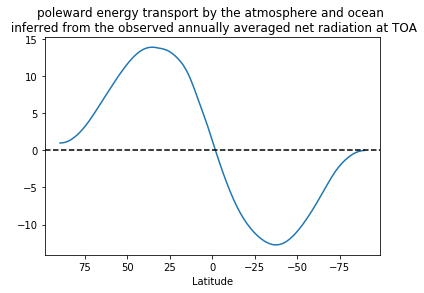

In [26]:
plt.figure()
plt.plot(OLR_toa_lw_all_timemean.lat.values, Net_flux_TOA_integral*0.01)
plt.xlabel('Latitude')
plt.title('poleward energy transport by the atmosphere and ocean \n inferred from the observed annually averaged net radiation at TOA')
plt.gca().invert_xaxis()#make same latititude axis as in the book
plt.axhline(y=0, color='black', linestyle='--')



In [27]:
ds.toa_sw_all_mon

<xarray.DataArray 'toa_sw_all_mon' (time: 1, lat: 180, lon: 360)>
array([[[122.35212, 122.35212, ..., 122.35212, 122.35212],
        [120.14607, 120.14607, ..., 120.14607, 120.14607],
        ...,
        [102.77345, 102.77345, ..., 102.77345, 102.77345],
        [102.90851, 102.90851, ..., 102.90851, 102.90851]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 2008-06-30
Attributes:
    standard_name:  TOA Shortwave Flux - All-Sky
    long_name:      Top of The Atmosphere Shortwave Flux, Monthly Means, All-...
    units:          W m-2
    CF_name:        toa_outgoing_shortwave_flux
    IPCC_name:      none
    valid_min:            0.00000
    valid_max:            600.000

In [28]:
#fig 2.4 Randall
#right units and magnitude
x_lat = OLR_toa_lw_all_timemean.lat.values #for plotting later
#make integrall of Net_flux_TOA_calc
Net_flux_TOA_integral = np.zeros(180)
for i in range(0,180):
    Net_flux_TOA_integral[i] = Net_flux_TOA_calc[0:i+1].sum()
Net_flux_TOA_integral.max()

1389.7790365789674

In [29]:
#required heat transport to balance net TOA radiation
lat_factor = np.zeros(180)
Net_flux_TOA_calc = np.zeros(180)
for i in range(0,180):
    ii = OLR_toa_lw_all_timemean.lat[i]#latitude in degrees
    lat_factor[i] = np.cos(np.deg2rad(ii))#cos(lat)
    Net_flux_TOA_calc[i] = Net_flux_TOA[i,:].mean() * lat_factor[i]



In [30]:
#fig 2.4 Randall
#right units and magnitude
x_lat = OLR_toa_lw_all_timemean.lat.values #for plotting later
#make integrall of Net_flux_TOA_calc
Net_flux_TOA_integral = np.zeros(180)
for i in range(0,180):
    Net_flux_TOA_integral[i] = Net_flux_TOA_calc[0:i+1].sum() 
Net_flux_TOA_integral.max()

1389.7790365789674

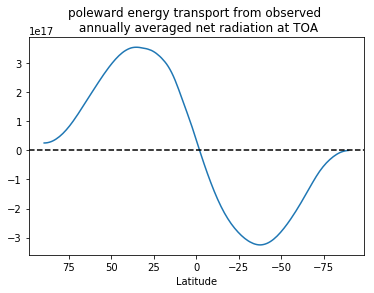

In [31]:
plt.figure()
plt.plot(x_lat, Net_flux_TOA_integral*(2*np.pi*(6.371*10**6)**2))
plt.xlabel('Latitude')
plt.title('poleward energy transport from observed \n annually averaged net radiation at TOA')
plt.gca().invert_xaxis()#make same latititude axis as in the book

plt.axhline(y=0, color='black', linestyle='--')

In [32]:
Net_flux_TOA_integral.max()*(2*np.pi*(6.371*10**6)**2)

3.544384551819727e+17

In [33]:
(2*np.pi*(6.371*10**6)**2)

255032235954894.12

In [34]:
Net_flux_TOA_integral*(2*np.pi*(6.371*10**6)**2)

array([-2.02047956e+14, -8.09135185e+14, -1.83052057e+15, -3.27932966e+15,
       -5.19331453e+15, -7.59633484e+15, -1.04788675e+16, -1.38289226e+16,
       -1.76411779e+16, -2.18841979e+16, -2.65769368e+16, -3.16891368e+16,
       -3.71689813e+16, -4.30885552e+16, -4.95555466e+16, -5.65192729e+16,
       -6.39656032e+16, -7.20050437e+16, -8.06504470e+16, -8.98384043e+16,
       -9.94110870e+16, -1.09371411e+17, -1.19646559e+17, -1.29998639e+17,
       -1.40286955e+17, -1.50520910e+17, -1.60631087e+17, -1.70648033e+17,
       -1.80570857e+17, -1.90346820e+17, -1.99965280e+17, -2.09352108e+17,
       -2.18496719e+17, -2.27419586e+17, -2.36132810e+17, -2.44594917e+17,
       -2.52711736e+17, -2.60545110e+17, -2.68083161e+17, -2.75269277e+17,
       -2.82113749e+17, -2.88586560e+17, -2.94621088e+17, -3.00171063e+17,
       -3.05203746e+17, -3.09726315e+17, -3.13699999e+17, -3.17097757e+17,
       -3.19906124e+17, -3.22105586e+17, -3.23698838e+17, -3.24723034e+17,
       -3.25108174e+17, -